<div class="big_title">LAB 5: Advanced data manipulation</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

In the previous labs, you learned....

how to identify objects like `variables`and `functions`, as well as some basic plotting techniques.

In this lab we will work on data cleaning tools and practices.


# Data manipulation using dplyr and tidyr

`dplyr` is a package for making tabular data manipulation easier. It pairs nicely with tidyr which enables you to swiftly convert between different data formats for plotting and analysis.

The `tidyverse` package is an "umbrella-package" that installs `tidyr`, `dplyr`, and several other packages useful for data analysis, such as `ggplot2`, `tibble`, etc.

The tidyverse package tries to address 3 common issues that arise when doing data analysis with some of the functions that come with R:

    1. The results from a base R function sometimes depend on the type of data.

    2. Using R expressions in a non standard way, which can be confusing for new learners.
    
    3. Hidden arguments, having default operations that new learners are not aware of.
    
You should already have installed and loaded the `tidyverse` package. If we haven't already done so, we can type install.packages("tidyverse") straight into the console. Then, to load the package type library(tidyverse)



In [64]:
install.packages("tidyverse")

library(tidyverse)

Installing package into 'C:/Users/flyin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'tidyverse' is in use and will not be installed"

# What are `dplyr` and `tidyr`?

The package `dplyr`provides easy tools for the most common data manipulation tasks. It is built to work directly with data frames, with many common tasks optimized by being written in a compiled language (C++). An additional feature is the ability to work directly with data stored in an external database. The benefits of doing this are that the data can be managed natively in a relational database, queries can be conducted on that database, and only the results of the query are returned.

This addresses a common problem with R in that all operations are conducted in-memory and thus the amount of data you can work with is limited by available memory. The database connections essentially remove that limitation in that you can connect to a database of many hundreds of GB, conduct queries on it directly, and pull back into R only what you need for analysis.

The package `tidyr` addresses the common problem of wanting to reshape your data for plotting and use by different R functions. Sometimes we want data sets where we have one row per measurement. Sometimes we want a data frame where each measurement type has its own column, and rows are instead more aggregated groups (e.g., a time period, an experimental unit like a plot or a batch number). Moving back and forth between these formats is non-trivial, and `tidyr` gives you tools for this and more sophisticated data manipulation.

To learn more about `dplyr` and `tidyr` , you may want to check out this handy data transformation with [`dplyr`](https://4.files.edl.io/b9e2/07/12/19/142839-a23788fb-1d3a-4665-9dc4-33bfd442c296.pdf) cheatsheet 

The data we will be examining today is from a lead in drinking water survey carried out in Nova Scotia.Lead in drinking water comes from legacy lead pipes or premise plumbing. The use of lead materials in plumbing was banned in Canada and the USA in 1975 and 1986, respectively. However, leaded materials still remain in many distribution systems.Lead corosion produces an extremely toxic by-product. Even at low concentrations, negative health impacts of lead exposure has been recognized and can disproportionately affect infants and pregnant women. To address lead exposure in drinking water, Health Canada implimented stricter drinking water lead guidelines in 2019. Prior to the implimentation of the new regulation, a drinking water quality survey was carried out in four utilities with varying water quality. The aim of the survey was to compare lead measured in parts per billion (ppb) using two drinking water sampling protocols: Random daytime (RDT), and flushed sampling.

First, we'll download the data.


As before, we'll read in our data using the `read_csv()` function from the tidyverse package `readr`. We will need to do the following:

1. Make a new directory on your Desktop and call it Lab5
1. Download the "Nova Scotia Drinking water lead survey data.csv" and "Nova Scotia Drinking water lead compliance sampling data.csv" datasets from Brightspace and place them in your Lab5 directory.
1. Open R Studio and change your working directory to Lab5. If you don't remeber how to do this, review [this section](https://diego-ibarra.github.io/biol3782/week1/index.html#RStudio's-%22Working-Directory%22)

In [65]:
#Survey data from sampling project
survey <- read_csv("Nova Scotia Drinking water lead survey data.csv")

#Complance data from government
compliance <- read_csv("Nova Scotia Drinking water lead compliance sampling data.csv")


Parsed with column specification:
cols(
  Address = col_character(),
  Date_sampled = col_character(),
  Municipality = col_character(),
  RDT_ppb = col_double()
)
Parsed with column specification:
cols(
  Address = col_character(),
  Date_sampled = col_character(),
  Municipality = col_character(),
  Flushed_ppb = col_double()
)


Let's take a look at the two datasets below:

In [68]:
survey  %>% 
head(4)

Address,Date_sampled,Municipality,RDT_ppb
A1,10/29/2018,Utility A,0.694
A2,10/29/2018,Utility A,1.255
A3,10/29/2018,Utility A,0.329
A4,10/29/2018,Utility A,0.885


In [69]:
compliance  %>% 
head(4)

Address,Date_sampled,Municipality,Flushed_ppb
A1,10/29/2018,Utility A,0.506
A2,10/29/2018,Utility A,0.389
A3,10/29/2018,Utility A,0.368
A4,10/29/2018,Utility A,0.168


The two datasets are similar but contain different parameter variables (RDT_ppb and Flushed_ppb). We can use `joins` if to combine both datasets into one, more complete dataset.

# Joins

Join functions allow you to connect multiple tables based on common variables(columns) so that you can access info from multiple tables at once. There are (believe it or not) 6 different ways to join tables. 

The most useful of these is a `left join`, which takes a table (say table 1), and then adds all matching records from table 2. The basic syntax of `left_join` is listed below

`left_join`(dataframe 1, dateframe 2, by = "variable names")

R will automatically detect which columns two tables have in common IF they are called the same thing. If not, you have to feed the matching columns names into the join function.

## Types of Joins

* `left join`: resulting table will show all records from table 1 (the left hand table), and matching records from table 2 (the right hand table)

* `right join`: result shows all records from table 2, and matching records from table 1

* `inner join`: result shows only 'matched' records - where there is a matching value in both tables

* `full join`: result shows all records from both tables

* `anti join`: removes all records from table 1 that have a match in table 2

* `semi join`: removes all records from table 2 that have a match in table 1

We can create a new dataframe with information all the information from both `survey` and `compliance` joining the two dataframes using the qualifying variables "Address", "Date_sampled", and "Municipality".


In [11]:
combined_lead<- left_join(survey,compliance, by =c("Address", "Date_sampled", "Municipality"))

[1] 106   5

Let's look at the combined dataset below

In [12]:
combined_lead  %>% 
head(4)

Address,Date_sampled,Municipality,RDT_ppb,Flushed_ppb
A1,10/29/2018,Utility A,0.694,0.506
A2,10/29/2018,Utility A,1.255,0.389
A3,10/29/2018,Utility A,0.329,0.368
A4,10/29/2018,Utility A,0.885,0.168


We can see that `left_join` combined RDT_ppb and Flushed_ppb data by the same address, municipality, and date sampled.

Next, we're going to learn some of the most common `dplyr` functions:

* `select()`: subset columns
* `filter()`: subset rows on conditions
* `mutate()`: create new columns by using information from other columns
* `group_by()` and `summarize()`: create summary statistics on grouped data
* `arrange()`: sort results
* `count()`: count discrete values

_________________________________________________________________________________________________________________________

# Selecting columns and filtering rows

If we only want to keep certain columns of data, we can use `select()`. The first argument to this function is the dataset, and the subsequent arguments are the columns to keep.

**select**(data, column names)

In the following code, we have selected the columns "Address", "Municipality", and "RDT_ppb". 

In [31]:
select(combined_lead, Address, Municipality, RDT_ppb) 

Address,Municipality,RDT_ppb
A1,Utility A,0.694
A2,Utility A,1.255
A3,Utility A,0.329
A4,Utility A,0.885
A5,Utility A,22.970
A6,Utility A,0.161
A7,Utility A,0.089
A8,Utility A,0.794
A9,Utility A,0.112
A10,Utility A,0.755


To select all columns except certain ones, put a "-" in front of the variable to exclude it. In the following code, we want to exclude the columns "Date_sampled" and "Municipality"

In [70]:
select(survey, -Date_sampled, -Municipality)

Address,RDT_ppb
A1,0.694
A2,1.255
A3,0.329
A4,0.885
A5,22.970
A6,0.161
A7,0.089
A8,0.794
A9,0.112
A10,0.755


<div class="Q"><br><br>

Using the "combined_lead" dataset and the "-", what would the code to recreate the dataset in line 32 look like?
    
ANSWER to be removed in final iteration: select(combined_lead, -Flushed_ppb) <br><br>
    
    
    other mutiple choice options: 
    
    select(combined_lead, Address, Date_sampled)
    
    select(combined_lead, Address, Date_sampled, Municipality, Flushed_ppb)
    
    select(combined_lead, Address, Date_sampled, Municipality, Flushed_ppb, -RDT_ppb) 

<br><br><div class="qhelp"></div></div>


What if we only want to select the data from one utility? You can also choose rows based on a specific criterion using the `filter()` function. The syntax for `filter()` is found below

filter(dataset, selection criteria)

In the following code, we want to select all data from Utility A only.

In [14]:
filter(combined_lead, Municipality == "Utility A")

Address,Date_sampled,Municipality,RDT_ppb,Flushed_ppb
A1,10/29/2018,Utility A,0.694,0.506
A2,10/29/2018,Utility A,1.255,0.389
A3,10/29/2018,Utility A,0.329,0.368
A4,10/29/2018,Utility A,0.885,0.168
A5,10/29/2018,Utility A,22.970,3.233
A6,10/29/2018,Utility A,0.161,0.438
A7,10/29/2018,Utility A,0.089,0.159
A8,10/29/2018,Utility A,0.794,0.201
A9,10/29/2018,Utility A,0.112,0.092
A10,10/29/2018,Utility A,0.755,0.657


We can also filter by multiple criteria. Say we want data from Utility A taken on 10/29/2018 only. We can use the `filter()` function and expand out selection criteria.

In [71]:
filter(combined_lead, Municipality=='Utility A', Date_sampled == '10/29/2018')

Address,Date_sampled,Municipality,RDT_ppb,Flushed_ppb
A1,10/29/2018,Utility A,0.694,0.506
A2,10/29/2018,Utility A,1.255,0.389
A3,10/29/2018,Utility A,0.329,0.368
A4,10/29/2018,Utility A,0.885,0.168
A5,10/29/2018,Utility A,22.970,3.233
A6,10/29/2018,Utility A,0.161,0.438
A7,10/29/2018,Utility A,0.089,0.159
A8,10/29/2018,Utility A,0.794,0.201
A9,10/29/2018,Utility A,0.112,0.092
A10,10/29/2018,Utility A,0.755,0.657


____________________________________________________________________________________________________________________________

# Nested functions vs Pipes (%>%)

What if you want to select and filter at the same time? There are three ways to do this: use intermediate steps, nested functions, or pipes.

With intermediate steps, you create a temporary data frame and use that as input to the next function. Let's create a subset of data with values of RDT_ppb < 5 then remove the Date_sampled column.

In [73]:
#Creates a new data frame with rows where RDT_ppb < 5
lessthan5 <- filter(combined_lead, RDT_ppb <5 )

#Then only selects the columns "Address", "Municipality", "RDT_ppb", and "Flushed_ppb"  
 lessthan5_sml<- select(lessthan5, Address, Municipality, RDT_ppb, Flushed_ppb)

#inspect new dataframe

lessthan5_sml  %>% 
head(8)

Address,Municipality,RDT_ppb,Flushed_ppb
A1,Utility A,0.694,0.506
A2,Utility A,1.255,0.389
A3,Utility A,0.329,0.368
A4,Utility A,0.885,0.168
A6,Utility A,0.161,0.438
A7,Utility A,0.089,0.159
A8,Utility A,0.794,0.201
A9,Utility A,0.112,0.092


This is readable, but is clunky and can clutter up your workspace with lots of small objects that youd have to keep track of.

Another method would be to nest functions (i.e. one function inside of another), like this:

In [ ]:
lessthan5_sml <- select(filter(combined_lead, RDT_ppb <5), Address, Municipality, RDT_ppb, Flushed_ppb)

R evaluates the expression from the inside out (in this case, filtering, then selecting). **I would avoid this method since it makes debugging your code a nightmare!**

A better method is to use pipes. Pipes let you take the output of one function and send it directly to the next, which is useful when you need to do many things to the same dataset. Pipes in R look like `%>%` and are made available via the `magrittr` package, installed automatically with `dplyr`. 

If you use RStudio, you can type the pipe with `Ctrl + Shift + M` if you have a PC or `Cmd + Shift + M` if you have a Mac.

We will re-create the `lessthan5_sml` dataset using pipes. First, we want to filter data from the `combined_lead` dataset, keeping rows where RDT_ppb < 5, then select only the Address, Municipality, RDT_ppb and Flushed_ppb columns. We will use the pipe to send the `combined_lead` dataset through the `filter()` then `select()` functions. 

In [75]:
combined_lead %>%
  filter(RDT_ppb < 5) %>% 
  select(Address, Municipality, RDT_ppb, Flushed_ppb)  %>% 
head(8)

Address,Municipality,RDT_ppb,Flushed_ppb
A1,Utility A,0.694,0.506
A2,Utility A,1.255,0.389
A3,Utility A,0.329,0.368
A4,Utility A,0.885,0.168
A6,Utility A,0.161,0.438
A7,Utility A,0.089,0.159
A8,Utility A,0.794,0.201
A9,Utility A,0.112,0.092


Since `%>%` takes the object on its left and passes it as the first argument to the function on its right, we don't need to explicitly include the data frame as an argument to the `filter()` and `select()` functions any more.

**Tidy data viewing tip**: Since `combined_lead` dataframe has 106 rows, we can use the `head()`  or `tail()` functions to specify the number of rows we would like to see. `head()` will show the top n rows while `tail()` will show the bottom n rows. If left blank, the default n is 6 rows. In this example, we want to see the first four rows only. 

In [30]:
combined_lead  %>% 
head(4)

Address,Date_sampled,Municipality,RDT_ppb,Flushed_ppb
A1,10/29/2018,Utility A,0.694,0.506
A2,10/29/2018,Utility A,1.255,0.389
A3,10/29/2018,Utility A,0.329,0.368
A4,10/29/2018,Utility A,0.885,0.168


_______________________________________________________________________________________________

# Mutate

We can use `mutate()` to create new columns based on the values in existing columns, for example to do unit conversions, or to find the ratio of values in two columns.

For example, the dataset containes negative values (-) which is an artifact of how the analyitical instrument quantifies lead concentrations. Analytical instruments will have quantified limits of detection. This is the smallest concentration that the intrument can accurately measure. In our case, the detection limit is 0.4 ppb. Many environmental datasets will contain similar types of data. We don't want to remove that data (since it will alter the trends of the dataset), instead we will create a classifier column for data below the detection limit (bdl).

We will use the function `if_else`. If the value in RDT_ppb is less than the detection limit (0.4) it will return the value "TRUE" or else it will return the value "FALSE".

In [43]:
combined_lead %>%
  mutate(RDT_bdl = if_else(RDT_ppb < 0.4, TRUE, FALSE))  %>% 
tail()

Address,Date_sampled,Municipality,RDT_ppb,Flushed_ppb,RDT_bdl
D13,10/29/2018,Utility D,0.012,0.013,TRUE
D14,10/29/2018,Utility D,-0.008,0.011,TRUE
D15,10/29/2018,Utility D,0.049,0.005,TRUE
D16,10/29/2018,Utility D,-0.007,-0.001,TRUE
D17,10/29/2018,Utility D,NA,0.013,NA
D18,6/20/2020,Utility D,NA,-0.001,NA


Some rows of the dataset are contain NAs, indicating that a sample was not taken from that address. We could insert a filter() in the chain and use the function `is.na()` to remove those rows. `is.na()` determines whether something is an NA. The `!` symbol negates the result, so if we're asking for every row where weight is not an NA, we use the syntax `!is.na()`.

In [44]:
combined_lead %>%
  filter(!is.na(RDT_ppb)) %>%
  mutate(RDT_bdl = if_else(RDT_ppb < 0.4, TRUE, FALSE)) %>%
  tail()

Address,Date_sampled,Municipality,RDT_ppb,Flushed_ppb,RDT_bdl
D11,10/29/2018,Utility D,0.053,0.027,TRUE
D12,10/29/2018,Utility D,0.003,0.014,TRUE
D13,10/29/2018,Utility D,0.012,0.013,TRUE
D14,10/29/2018,Utility D,-0.008,0.011,TRUE
D15,10/29/2018,Utility D,0.049,0.005,TRUE
D16,10/29/2018,Utility D,-0.007,-0.001,TRUE


_______________________________________________________________________________________________

# Split-apply-combine data analysis and the summarize() function

Many data analysis tasks can be approached using the split-apply-combine paradigm: 

1. split the data into groups 
1. apply some analysis to each group
1. combine the results. 

dplyr makes this very easy through the use of the `group_by()` function. `group_by()` is often used together with `summarize()`, which collapses each group into a single-row summary of that group. `group_by()` takes as arguments the column names that contain the categorical variables for which you want to calculate the summary statistics. 

In the example below, we compute the mean and standard deviation of RDT lead concentrations by Municipality.

In [76]:
combined_lead %>% #dataframe
  group_by(Municipality) %>% #group by criteria
  summarize(mean_ppb = mean(RDT_ppb, na.rm = TRUE),
           dev_ppb=sd(RDT_ppb, na.rm = TRUE)) #function summarize() applies the function mean() to the entirety of the dataframe 

`summarise()` ungrouping output (override with `.groups` argument)


Municipality,mean_ppb,dev_ppb
Utility A,2.0612162,4.1899977
Utility B,0.7459286,1.0045024
Utility C,0.4381000,0.7422806
Utility D,0.3752500,1.1559148


Let's take a look at our data graphically. We can see that Utility A has the highest average RDT lead concentration but is also the most variable. 

`summarise()` ungrouping output (override with `.groups` argument)


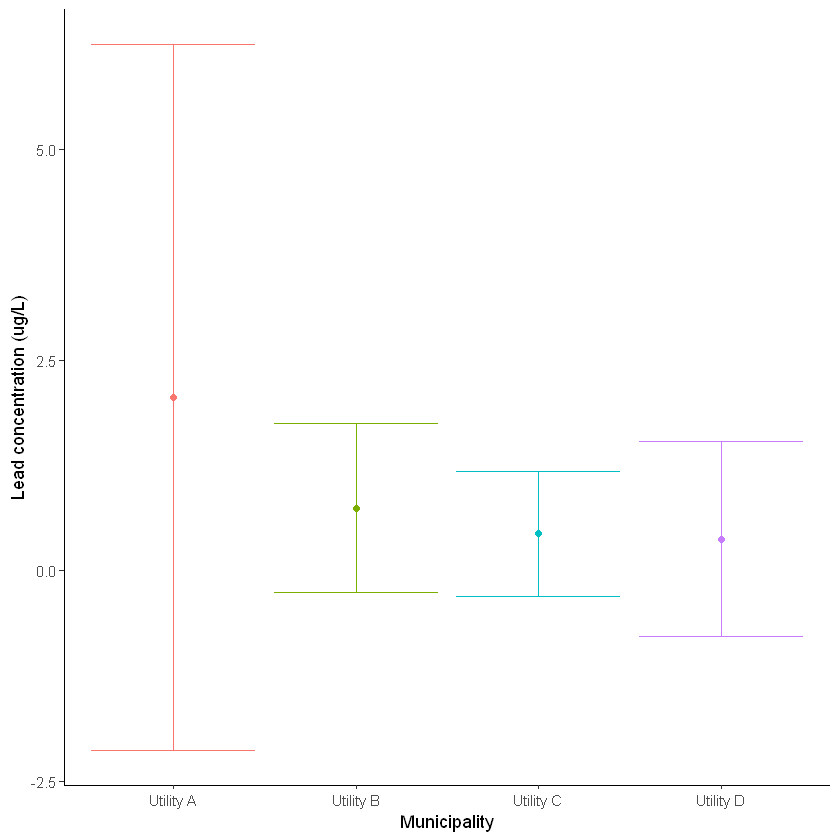

In [77]:
combined_lead %>%
  group_by(Municipality) %>% 
  summarize(mean_ppb = mean(RDT_ppb, na.rm = TRUE),
           dev_ppb=sd(RDT_ppb, na.rm = TRUE)) %>% 
ggplot(aes(color=Municipality))+
geom_point(aes(x=Municipality, y=mean_ppb, color=Municipality))+
geom_errorbar(aes(x=Municipality,ymin=mean_ppb-dev_ppb, ymax=mean_ppb+dev_ppb))+
theme_classic()+
labs(y="Lead concentration (ug/L)")+
guides(color=FALSE)

We can also group by mutliple columns.

In [50]:
combined_lead %>%
  group_by(Date_sampled, Municipality) %>%
  summarize(mean_ppb = mean(RDT_ppb, na.rm = TRUE),
           dev_ppb=sd(RDT_ppb, na.rm = TRUE))  

`summarise()` regrouping output by 'Date_sampled' (override with `.groups` argument)


Date_sampled,Municipality,mean_ppb,dev_ppb
10/2/2018,Utility A,4.0015000,5.2347115
10/29/2018,Utility A,2.1950667,5.7782549
10/29/2018,Utility B,0.6145714,0.8376333
10/29/2018,Utility C,0.4381000,0.7422806
10/29/2018,Utility D,0.3752500,1.1559148
11/5/2018,Utility A,1.2212222,2.3253493
6/20/2020,Utility B,0.5923333,1.0642146
6/20/2020,Utility D,NaN,NA
8/29/2018,Utility A,2.2131818,2.8199468
8/29/2018,Utility B,1.0528889,1.0795784


We can see that Utility D did not take samples on 6/20/2020, resulting in NA values. The resulting mean_weight column does not contain NA but **NaN** (which refers to "Not a Number") because `mean()` was called on a vector of NA values while at the same time setting `na.rm = TRUE`. To avoid this, we can remove the missing values before we attempt to calculate the summary statistics. Because the missing values are removed first, we can omit `na.rm = TRUE` when computing the mean:

In [52]:
combined_lead %>%
  filter(!is.na(RDT_ppb)) %>% 
  group_by(Date_sampled, Municipality) %>%
  summarize(mean_ppb = mean(RDT_ppb),
           dev_ppb=sd(RDT_ppb))  

`summarise()` regrouping output by 'Date_sampled' (override with `.groups` argument)


Date_sampled,Municipality,mean_ppb,dev_ppb
10/2/2018,Utility A,4.0015000,5.2347115
10/29/2018,Utility A,2.1950667,5.7782549
10/29/2018,Utility B,0.6145714,0.8376333
10/29/2018,Utility C,0.4381000,0.7422806
10/29/2018,Utility D,0.3752500,1.1559148
11/5/2018,Utility A,1.2212222,2.3253493
6/20/2020,Utility B,0.5923333,1.0642146
8/29/2018,Utility A,2.2131818,2.8199468
8/29/2018,Utility B,1.0528889,1.0795784


We can also arrange the values in order of mean_ppb using the `arrange()` function. To sort in descending order, we need to add the `desc()` function.

In [27]:
combined_lead %>%
  filter(!is.na(RDT_ppb)) %>% 
  group_by(Date_sampled, Municipality) %>%
  summarize(mean_ppb = mean(RDT_ppb),
           dev_ppb=sd(RDT_ppb)) %>%
  arrange(desc(mean_ppb))

`summarise()` regrouping output by 'Date_sampled' (override with `.groups` argument)


Date_sampled,Municipality,mean_ppb,dev_ppb
10/2/2018,Utility A,4.0015000,5.2347115
8/29/2018,Utility A,2.2131818,2.8199468
10/29/2018,Utility A,2.1950667,5.7782549
11/5/2018,Utility A,1.2212222,2.3253493
8/29/2018,Utility B,1.0528889,1.0795784
10/29/2018,Utility B,0.6145714,0.8376333
6/20/2020,Utility B,0.5923333,1.0642146
10/29/2018,Utility C,0.4381000,0.7422806
10/29/2018,Utility D,0.3752500,1.1559148


_______________________________________________________________________________________________

# Counting observations

When working with data, we often want to know the number of observations found for each factor or combination of factors. For this task, dplyr provides `count()`. 

In [58]:
combined_lead %>%
    group_by(Municipality) %>%
    summarise(count = n())

`summarise()` ungrouping output (override with `.groups` argument)


Municipality,count
Utility A,37
Utility B,29
Utility C,22
Utility D,18


If we wanted to count combination of factors, such as `Date_sampled` and `Municipality`, we would specify the first and the second factor as the arguments of `count()`:

In [61]:
combined_lead%>%
  count(Date_sampled, Municipality) 

Date_sampled,Municipality,n
10/2/2018,Utility A,2
10/29/2018,Utility A,15
10/29/2018,Utility B,7
10/29/2018,Utility C,22
10/29/2018,Utility D,17
11/5/2018,Utility A,9
6/20/2020,Utility B,13
6/20/2020,Utility D,1
8/29/2018,Utility A,11
8/29/2018,Utility B,9


We can proceed with `arrange()` to sort the table according to a number of criteria so that we have a better comparison. For instance, we might want to arrange the table above in:

1. by date sampled and,
1. in descending order of the count:

In [57]:
combined_lead%>%
  count(Date_sampled, Municipality)  %>%
  arrange(Date_sampled, desc(n))

Date_sampled,Municipality,n
10/2/2018,Utility A,2
10/29/2018,Utility C,22
10/29/2018,Utility D,17
10/29/2018,Utility A,15
10/29/2018,Utility B,7
11/5/2018,Utility A,9
6/20/2020,Utility B,13
6/20/2020,Utility D,1
8/29/2018,Utility A,11
8/29/2018,Utility B,9


_________________________________________________________________________

# Reshaping your dataframe with **pivot_longer** and **pivot_wider()**

Useful links:

1. [Pivot tutorial](https://tidyr.tidyverse.org/articles/pivot.html)
1. [pivot_longer](https://rdrr.io/github/tidyverse/tidyr/man/pivot_longer.html)
1. [pivot_wider](https://tidyr.tidyverse.org/reference/pivot_wider.html)

Sometimes you may need to alter the layout of tabluar datasets while preserving the values and relationships contained within. This can also be very useful when plotting data from very large datasets with multiple columns. You may have heard of `spread()` and `gather()`. These are functions with similar but more limited functionality and were replaced by `pivot_wider()` and `pivot_longer()`.

In `combined_lead`, the rows contain the values of variables associated with each sample/observation (i.e. RDT_ppb or Flushed_ppb). What if we wanted to compare RDT and Flushed lead concentrations between Utilities A and B using a box plot? We could try using two `geom_boxplot()` functions:


Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

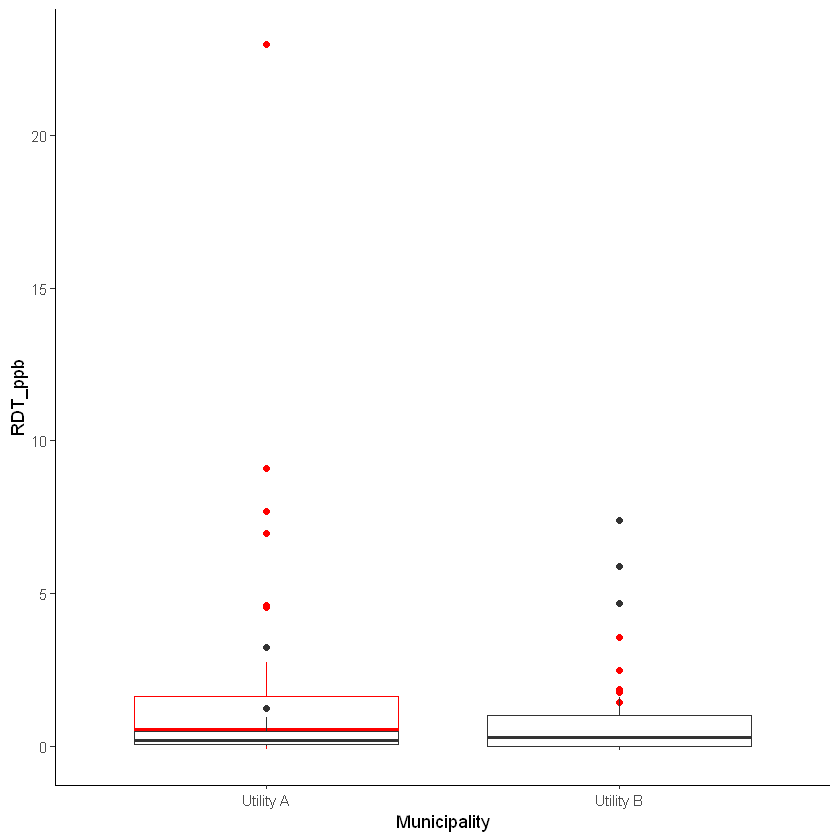

In [41]:
combined_lead %>% 
filter(Municipality %in%c("Utility A", "Utility B")) %>% 
ggplot()+
geom_boxplot(aes(x=Municipality, y=RDT_ppb), color="red")+
geom_boxplot(aes(x=Municipality, y=Flushed_ppb))+
theme_classic()

Whoops! That just created a messy, uninformative plot. One way to do it would be to create separate plots for Flushed_ppb and RDT_ppb but that's too much work. What we can do instead is reshape our data to turn RDT_ppb and FLushed_ppb into factors in a new criteria column and copy all their values into one "values" column.

## pivot_longer

In this situation we are gathering the column names and turning them into a pair of new variables. One variable represents the column names as values, and the other variable contains the values previously associated with the column names.

**pivot_longer** moves columns into rows (wide to long format). `pivot_longer` takes several arguements but the most important ones for this exercise are `names_to` and `values_to`. `names_to` creates a new classifier/criteria column, taking arguements from your column names. `values_to` takes values from those columns and creates a new column of values classfied by the factors created by `names_to`.

We will use `pivot_longer` to convert RDT_ppb and Flushed_ppb into two factors under a variable called protocol. The values from RDT_ppb adn Flushed_ppb will be passed into a new column called Lead_ppb. 


In [59]:
combined_lead_gather <-combined_lead %>%
filter(Municipality %in%c("Utility A", "Utility B")) %>% 
select(Municipality, RDT_ppb, Flushed_ppb) %>% 
  pivot_longer(names_to="protocol", values_to="Lead_ppb", !Municipality)

combined_lead_gather  %>% 
head(8)

Municipality,protocol,Lead_ppb
Utility A,RDT_ppb,0.694
Utility A,Flushed_ppb,0.506
Utility A,RDT_ppb,1.255
Utility A,Flushed_ppb,0.389
Utility A,RDT_ppb,0.329
Utility A,Flushed_ppb,0.368
Utility A,RDT_ppb,0.885
Utility A,Flushed_ppb,0.168


Now let's try that plot again!

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

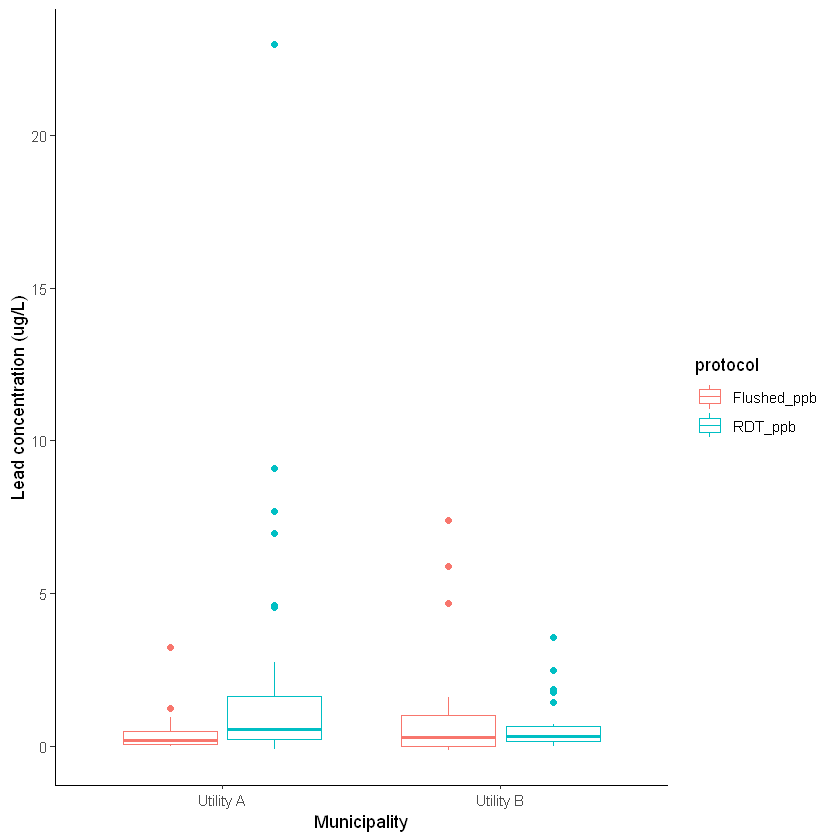

In [56]:
combined_lead_gather %>% 
ggplot()+
geom_boxplot(aes(x=Municipality, y=Lead_ppb, color=protocol))+
theme_classic()+
labs(y="Lead concentration (ug/L)")

## pivot_wider

**pivot_wider** moves rows into columns (long to wide format)

Let's use `pivot_wider()` to transform `combined_lead` to find the mean of `RDT_ppb` of each `Municipality` in each plot over the different sample dates. We use `filter()`, `group_by()`, and `summarise()` to filter our observations and variables of interest, and create a new variable for the mean_ppb.

In [60]:
combined_lead_gw<-combined_lead %>%
  filter(!is.na(RDT_ppb)) %>% 
  group_by(Date_sampled, Municipality) %>%
  summarize(mean_RDT = mean(RDT_ppb))

dim(combined_lead_gw)

combined_lead_gw

`summarise()` regrouping output by 'Date_sampled' (override with `.groups` argument)


[1] 9 3

Date_sampled,Municipality,mean_RDT
10/2/2018,Utility A,4.0015000
10/29/2018,Utility A,2.1950667
10/29/2018,Utility B,0.6145714
10/29/2018,Utility C,0.4381000
10/29/2018,Utility D,0.3752500
11/5/2018,Utility A,1.2212222
6/20/2020,Utility B,0.5923333
8/29/2018,Utility A,2.2131818
8/29/2018,Utility B,1.0528889


This yields the object `combined_lead_gw` where the observations for each plot are spread across multiple rows, 9 observations of 3 variables. Using `pivot_wider()` to key on Municipality with values from mean_ppb this becomes 5 observations of  5 variables, one row for each plot.

In [62]:
combined_lead_spread<-combined_lead_gw %>%
  pivot_wider(names_from="Municipality", values_from="mean_RDT")

#examine data

combined_lead_spread

Date_sampled,Utility A,Utility B,Utility C,Utility D
10/2/2018,4.001500,NA,NA,NA
10/29/2018,2.195067,0.6145714,0.4381,0.37525
11/5/2018,1.221222,NA,NA,NA
6/20/2020,NA,0.5923333,NA,NA
8/29/2018,2.213182,1.0528889,NA,NA


_________________________________________________________________________

# Exporting data

Now that you have learned how to use dplyr to extract information from or summarize your raw data, you may want to export these new data sets to share them with your collaborators or for archival.

Similar to the `read_csv()` function used for reading CSV files into R, there is a `write_csv()` function that generates CSV files from data frames.

Before using `write_csv()`, we are going to create a new folder, data, in our working directory that will store this generated dataset. We don't want to write generated datasets in the same directory as our raw data. It's good practice to keep them separate. The data_raw folder should only contain the raw, unaltered data, and should be left alone to make sure we don't delete or modify it. In contrast, our script will generate the contents of the data directory, so even if the files it contains are deleted, we can always re-generate them.

Now that our data set is ready, we can save it as a CSV file in our data folder.


In [ ]:
write_csv(surveys_complete, file = "data/surveys_complete.csv")

<span class="console"></span> <br>
----------------------------- <br>
<span class="editor"></span> <br>
----------------------------- <br>
<span class="c2c"></span> <br>
<div class="c2c"></div> <br>
----------------------------- <br>
<span class="run"></span> <br>
<div class="run"></div> <br>
----------------------------- <br>
<span class="runcell"></span> <br>
<div class="runcell"></div> <br>
----------------------------- <br>
<span class="file">Text</span> <br>
<div class="file">Text</div> <br>
----------------------------- <br>
<span class="important"></span> <br>
<div class="important"></div> <br>
----------------------------- <br>
<span class="note"></span> <br>
<div class="note"></div> <br>
----------------------------- <br>
<span class="checkpoint">Text</span> <br>
<div class="checkpoint">Text</div> <br>
-----------------------------
<span class="codeerror">Text</span> <br>
<div class="codeerror">Text</div> <br>
----------------------------- <br>
<span class="lineerror">Text</span> <br>
<div class="lineerror">Text</div> <br>
----------------------------- <br>
<span class="terminal"></span> <br>
<div class="terminal"></div> <br>
----------------------------- <br>
<span class="terminalBlock">Text</span> <br>
<div class="terminalBlock">Text</div> <br>
----------------------------- <br>
<span class="nomenclature">nomenclature</span> <br>
<div class="nomenclature">nomenclature</div> <br>
----------------------------- <br>
<span class="code">code</span> <br>
<div class="code">code</div> <br>
----------------------------- <br>
<span class="rendered_html">rendered_html</span> <br>
<div class="rendered_html">rendered_html</div> <br>
----------------------------- <br>

<br><br><br>
<div class="startTASK"></div>

Write task here

<div class="endTASK"></div>
<br><br><br>



<img src="../media/R_logo.png" width="150px">
<a href="bad_layout.png" target="_blank"><img src="bad_layout.png" width="700px"></a>

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [63]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>body {counter-reset: question_num;}.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) '\\A'; white-space: pre; }</style>")